In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import sys
import numpy as np
import matplotlib.pyplot as plt
from wmin.utils import FLAV_INFO
from wmin.api import API as wminAPI

from colibri.export_results import write_exportgrid
from colibri.constants import EXPORT_LABELS, LHAPDF_XGRID
import lhapdf
import pathlib
import os
import yaml

# Set the path to the style file
plt.style.use("../colibristyle_colorblind.mplstyle")
sys.path.insert(0, "./")
from distance_def import *




Using Keras backend


#### Construction of the test basis

The test basis is the set of random replicas sampled from the original distribution.
The completeness of the POD basis consists in its ability to reproduce these replicas.

In [2]:
# define the PDF prior model from which to sample random replicas
inp = {
    "flav_info": FLAV_INFO,
    "replica_range_settings": {"min_replica": 1, "max_replica": 1000},
    "impose_sumrule": True,
    "fitbasis": "EVOL",
    "nodes": [25, 20, 8],
    "activations": ["tanh", "tanh", "linear"],
    "initializer_name": "glorot_normal",
    "layer_type": "dense",
    "filter_arclength_outliers": True,
}


In [7]:
pdf_grid = wminAPI.n3fit_pdf_grid(**{**inp, "replica_range_settings": {"min_replica": 245000, "max_replica": 245131},})

In [8]:
pdf_grid.shape

(119, 14, 196)

In [9]:
WRITE_GRID = np.array(pdf_grid.transpose(0, 2, 1))
fit_name = "out_of_sample_test"

if not os.path.exists(fit_name):
    os.makedirs(fit_name)
    os.makedirs(fit_name + "/replicas")
    os.makedirs(fit_name + "/input")
    # create runcard.yaml firl in input folder
    runc = {"theoryid": 40000000}
    with open(fit_name + "/input/runcard.yaml", "w") as f:
        f.write(yaml.dump(runc))

replicas_path = fit_name / pathlib.PosixPath("replicas")

if not os.path.exists(replicas_path):
    os.makedirs(replicas_path)

for i in range(WRITE_GRID.shape[0]):
        
        grid_for_writing = WRITE_GRID[i].T

        replica_index = i + 1
        rep_path = replicas_path / f"replica_{replica_index}"
        rep_path.mkdir(exist_ok=True)
        grid_name = rep_path / fit_name

        
        write_exportgrid(
            grid_for_writing=grid_for_writing,
            grid_name=str(grid_name),
            replica_index=replica_index,
            Q=1.65,
            xgrid=LHAPDF_XGRID,
            export_labels=EXPORT_LABELS,
        )

print("Test basis generated, still needs to be evolved")

Test basis generated, still needs to be evolved


### Completeness test

In [12]:
flavour = {
    1: "d",
    -1: r"$\bar{d}$",
    2: "u",
    -2: r"$\bar{u}$",
    3: "s",
    -3: r"$\bar{s}$",
    4: "c",
    -4: r"$\bar{c}$",
    5: "b",
    -5: "bbar",
    6: "t",
    21: "g"
}

# Set Q scale
Q = 1.65

flavours = [1, -1, 2, -2, 3, -3, 4, 21]

In [13]:
PDF_sets = {
    "out_of_sample_test": 100, 
}

pdfs_target = []

x_grid = LHAPDF_XGRID[36:] # points that are >= 1e-5

for PDF_set in PDF_sets:
    for i in range(PDF_sets[PDF_set]):
        pdfs_target.append(lhapdf.mkPDF(PDF_set, i+1))

central_pdf_target =  lhapdf.mkPDF("out_of_sample_test", 0)
center_pdf_target_grid = pdf_grid_allflav(central_pdf_target, flavours, x_grid, Q)

LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/out_of_sample_test/out_of_sample_test_0001.dat
out_of_sample_test PDF set, member #1, version 1; LHAPDF ID = 1
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/out_of_sample_test/out_of_sample_test_0002.dat
out_of_sample_test PDF set, member #2, version 1; LHAPDF ID = 2
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/out_of_sample_test/out_of_sample_test_0003.dat
out_of_sample_test PDF set, member #3, version 1; LHAPDF ID = 3
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/out_of_sample_test/out_of_sample_test_0004.dat
out_of_sample_test PDF set, member #4, version 1; LHAPDF ID = 4
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/out_of_sample_test/out_of_sample_test_0005.dat
out_of_sample_test PDF set, member #5, versi

In [14]:
basis_dim = 100
pdf_basis = "250503_pod_basis_40k" 

wmin_tot_basis = []
center_pdf = lhapdf.mkPDF(pdf_basis, 0)
center_pdf_grid = pdf_grid_allflav(center_pdf, flavours, x_grid, Q)

for i in range(basis_dim):
    wmin_tot_basis.append(lhapdf.mkPDF(pdf_basis, i+1))

LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0000.dat
250503_pod_basis_40k PDF set, member #0, version 1
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0001.dat
250503_pod_basis_40k PDF set, member #1, version 1; LHAPDF ID = 1
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0002.dat
250503_pod_basis_40k PDF set, member #2, version 1; LHAPDF ID = 2
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0003.dat
250503_pod_basis_40k PDF set, member #3, version 1; LHAPDF ID = 3
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0004.dat
250503_pod_basis_40k PDF set, m

In [15]:
distances = []
basis_dim_distances = []
summed_distances = []
mean_squared_error = []
median_squared_error = []

basis_dims = [30, 40, 50, 60, 70, 80, 90]

for basis_dim in basis_dims:
    wmin_basis = wmin_tot_basis[:basis_dim]
    
    distance = []
    for pdf in pdfs_target:
        original, reco, w, d = wmin_distance(pdf, center_pdf_grid, wmin_basis, flavours, x_grid, Q, dist_type=0)
        distance.append(d)

    basis_dim_distances.append((basis_dim, distance))
    distances.append(distance)
    # 
    summed_distances.append(np.sum(distance))
    mean_squared_error.append(np.mean(distance))
    median_squared_error.append(np.median(distance))

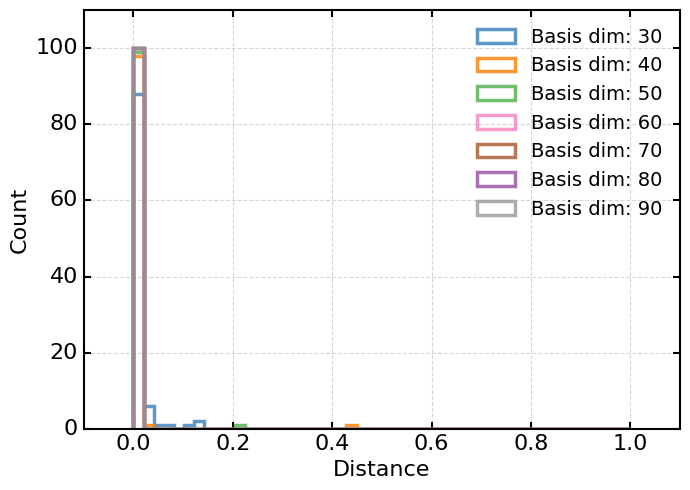

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))
bins = np.linspace(0, 1., 50)

for (x, d) in basis_dim_distances:
    ax.hist(d, label=f"Basis dim: {x}",
            bins=bins,
            linewidth=2.5,  # Slightly thicker lines for visibility
            histtype="step",
            density=False,
            alpha=0.8)  # Adjust transparency for clarity

# Labels and legend
ax.set_xlabel("Distance", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.legend(frameon=False, fontsize=14)

# Improve grid visibility
ax.grid(True, linestyle="--", alpha=0.5)

# Adjust layout and save
plt.tight_layout()
plt.savefig("basis_dim_histograms.pdf", dpi=300)
plt.show()


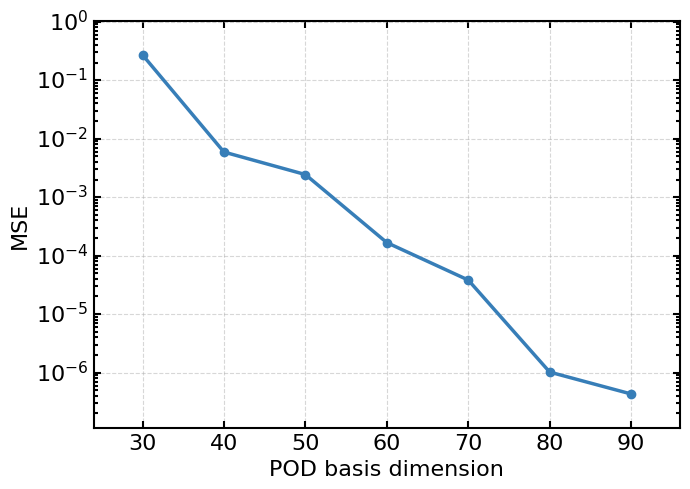

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(basis_dims, mean_squared_error, "-o", label=f"MSE", linewidth=2.5)

# Labels and legend 
ax.set_xlabel("POD basis dimension", fontsize=16)
ax.set_ylabel("MSE", fontsize=16)
# ax.legend(frameon=False, fontsize=14)

# Improve grid visibility
ax.grid(True, linestyle="--", alpha=0.5)

ax.set_yscale("log")

# Adjust layout and save
plt.tight_layout()
fig.savefig("mse_log_completeness.pdf")
plt.show()


# Plot PDFs

In [20]:
original, reco, w, d = wmin_distance(
    pdfs_target[2], center_pdf_grid, wmin_tot_basis[:50], flavours, x_grid, Q, dist_type=0
)

EPSILON = 1e-6
with PdfPages("plots_PDF_50w.pdf") as pdf:
    for i in range(len(flavours)):

        fig, [axup, axdown] = plt.subplots(
            2, 1, sharex=True, figsize=(7, 7), gridspec_kw={"height_ratios": [3, 1], "hspace": 0.05}
        )
        
        # Upper plot: original vs reconstructed PDF
        axup.plot(x_grid, original[i], label="Original", linewidth=4)
        axup.plot(x_grid, reco[i], label="Reconstructed", linewidth=3, linestyle="dashed")

        # Lower plot: Ratio plot
        axdown.plot(x_grid, reco[i] / (original[i]+EPSILON), linewidth=3)
        axdown.axhline(1.0, color="gray", linestyle="--", linewidth=1.5, alpha=0.7)  # Reference line
        axdown.set_ylim(0.9, 1.1)  # Adjust for better readability
        axdown.set_xlabel("x", fontsize=16)
        axdown.set_ylabel("Ratio", fontsize=16)

        # Formatting upper plot
        axup.set_title(f"{flavour[flavours[i]]}(x) PDF", fontsize=16)
        axup.set_xscale("log")
        axup.set_ylabel(r"$x f(x)$", fontsize=16)
        axup.legend(frameon=False, fontsize=14)

        # Improve grid visibility
        axup.grid(True, linestyle="--", alpha=0.5)
        axdown.grid(True, linestyle="--", alpha=0.5)

        # Save and close
        pdf.savefig(bbox_inches="tight")
        plt.close()
